Data import and preparation

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import statistics as stats
import matplotlib.pyplot as plt
import seaborn as sns

# pd.set_option("display.precision", 2)

injury_dataset = pd.read_csv('injury_data.csv')

# injury_dataset['Training_Intensity_Percentage'] = injury_dataset['Training_Intensity'] * 100
# training_intensity_index = injury_dataset.columns.get_loc('Training_Intensity')
# injury_dataset.pop('Training_Intensity')
# injury_dataset.insert(training_intensity_index + 1, 'Training_Intensity', injury_dataset.pop('Training_Intensity_Percentage'))
# injury_dataset['Training_Intensity'] = injury_dataset['Training_Intensity'].map('{:.2f}%'.format)

injury_dataset.head()

,Player_Age,Player_Weight,Player_Height,Previous_Injuries,Training_Intensity,Recovery_Time,Likelihood_of_Injury
0,24,66.251933,175.732429,1,0.457929,5,0
1,37,70.996271,174.581650,0,0.226522,6,1
2,32,80.093781,186.329618,0,0.613970,2,1
3,28,87.473271,175.504240,1,0.252858,4,1
4,25,84.659220,190.175012,0,0.577632,1,1


Statistics on the dataset

In [2]:
injury_dataset.describe()

,Player_Age,Player_Weight,Player_Height,Previous_Injuries,Training_Intensity,Recovery_Time,Likelihood_of_Injury
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,28.231000,74.794351,179.750948,0.515000,0.490538,3.466000,0.50000
std,6.538378,9.892621,9.888921,0.500025,0.286184,1.701099,0.50025
min,18.000000,40.191912,145.285701,0.000000,0.000031,1.000000,0.00000
25%,22.000000,67.944028,173.036976,0.000000,0.241042,2.000000,0.00000
50%,28.000000,75.020569,180.034436,1.000000,0.483912,4.000000,0.50000
75%,34.000000,81.302956,186.557913,1.000000,0.730404,5.000000,1.00000
max,39.000000,104.650104,207.308672,1.000000,0.997749,6.000000,1.00000


In [3]:
injury_dataset['Likelihood_of_Injury'].value_counts()

Likelihood_of_Injury
0    500
1    500
Name: count, dtype: int64

In [4]:
player_age_mode = stats.mode(injury_dataset['Player_Age'])
print('Player Age Mode: ', player_age_mode)

player_weight_mode = stats.mode(injury_dataset['Player_Weight'])
print('Player Weight Mode: ', player_weight_mode)

player_height_mode = stats.mode(injury_dataset['Player_Height'])
print('Player Height Mode: ', player_height_mode)

previous_injuries_mode = stats.mode(injury_dataset['Previous_Injuries'])
print('Previous Injuries Mode: ', previous_injuries_mode)

training_intensity_mode = stats.mode(injury_dataset['Training_Intensity'])
print('Training Intensity Mode: ', training_intensity_mode)

recovery_time_mode = stats.mode(injury_dataset['Recovery_Time'])
print('Recovery Time Mode: ', recovery_time_mode)

Player Age Mode:  18
Player Weight Mode:  66.25193286255299
Player Height Mode:  175.73242883117646
Previous Injuries Mode:  1
Training Intensity Mode:  0.4579289944340279
Recovery Time Mode:  2


In [5]:
injury_dataset.groupby('Likelihood_of_Injury').var()

,Player_Age,Player_Weight,Player_Height,Previous_Injuries,Training_Intensity,Recovery_Time
Likelihood_of_Injury,,,,,,
0,44.333768,96.263819,104.385813,0.250485,0.083247,2.979896
1,41.252681,99.659544,91.219709,0.249343,0.079414,2.812024


In [6]:
injury_dataset.groupby('Likelihood_of_Injury').corr()

Player_Age  Player_Weight  \
Likelihood_of_Injury                                                 
0                    Player_Age            1.000000      -0.047520   
                     Player_Weight        -0.047520       1.000000   
                     Player_Height         0.028468      -0.010951   
                     Previous_Injuries    -0.059560       0.112436   
                     Training_Intensity    0.010869       0.066595   
                     Recovery_Time        -0.029567      -0.105020   
1                    Player_Age            1.000000      -0.032950   
                     Player_Weight        -0.032950       1.000000   
                     Player_Height         0.063286       0.074139   
                     Previous_Injuries    -0.031207      -0.042775   
                     Training_Intensity    0.073294       0.022206   
                     Recovery_Time        -0.045779      -0.016064   

                                         Player_Height  Previous_Injuries  \
Likelihood_of_Injury                                                        
0                    Player_Age               0.028468          -0.059560   
                     Player_Weight           -0.010951           0.112436   
                     Player_Height            1.000000           0.034986   
                     Previous_Injuries        0.034986           1.000000   
                     Training_Intensity       0.052716           0.000910   
                     Recovery_Time            0.022724          -0.037150   
1                    Player_Age               0.063286          -0.031207   
                     Player_Weight            0.074139          -0.042775   
                     Player_Height            1.000000          -0.022450   
                     Previous_Injuries       -0.022450           1.000000   
                     Training_Intensity       0.038271          -0.051246   
                     Recovery_Time            0.037279           0.027570   

                                         Training_Intensity  Recovery_Time  
Likelihood_of_Injury                                                        
0                    Player_Age                    0.010869      -0.029567  
                     Player_Weight                 0.066595      -0.105020  
                     Player_Height                 0.052716       0.022724  
                     Previous_Injuries             0.000910      -0.037150  
                     Training_Intensity            1.000000      -0.019078  
                     Recovery_Time                -0.019078       1.000000  
1                    Player_Age                    0.073294      -0.045779  
                     Player_Weight                 0.022206      -0.016064  
                     Player_Height                 0.038271       0.037279  
                     Previous_Injuries            -0.051246       0.027570  
                     Training_Intensity            1.000000      -0.057007  
                     Recovery_Time                -0.057007       1.000000

Standard Deviation Plots

                      Player_Age  Player_Weight  Player_Height  \
Likelihood_of_Injury                                             
0                       6.658361       9.811413      10.216938   
1                       6.422825       9.982963       9.550901   

                      Previous_Injuries  Training_Intensity  Recovery_Time  
Likelihood_of_Injury                                                        
0                              0.500485            0.288526       1.726237  
1                              0.499342            0.281805       1.676909  


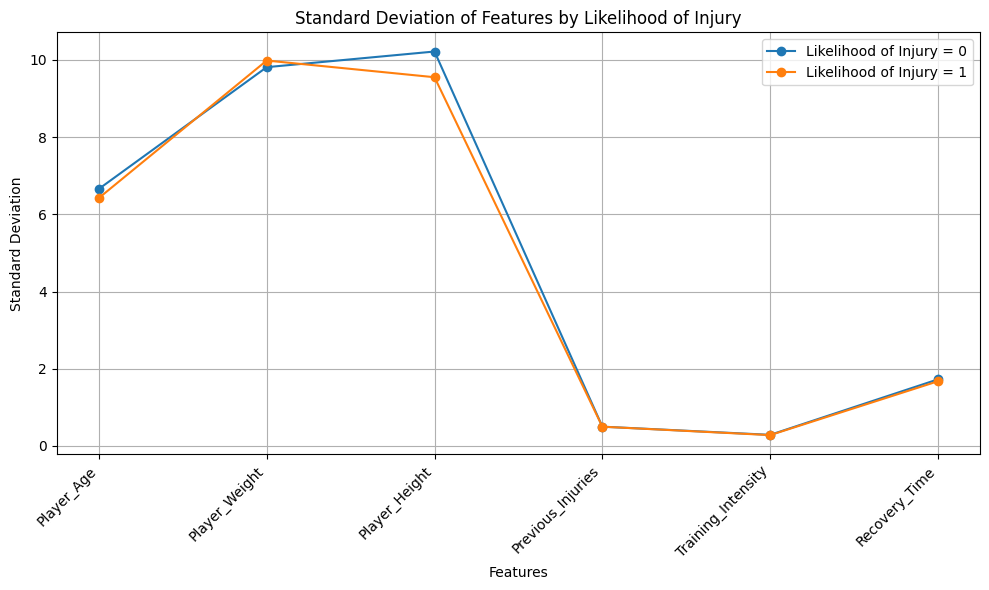

In [7]:
# Group by 'Likelihood_of_Injury' and calculate the standard deviation for each feature
standard_deviations = injury_dataset.groupby('Likelihood_of_Injury').std()

# Plot the standard deviations as line graphs
features = standard_deviations.columns
likelihoods = standard_deviations.index

fig, ax = plt.subplots(figsize=(10, 6))
for likelihood in likelihoods:
    ax.plot(features.str.replace('_', ' '), standard_deviations.loc[likelihood], marker='o', label=f'Likelihood of Injury = {likelihood}')

ax.set_title('Standard Deviation of Features by Likelihood of Injury')
ax.set_xlabel('Features')
ax.set_ylabel('Standard Deviation')
ax.legend()
ax.grid(True)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()